In [1]:
import torch
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [32]:
path = './output.txt'
all_outputs = []
with open(path, 'rb') as f:
    lines = f.readlines()
    cur_output = []
    count = 0
    for line in lines:
        cur_line = line.decode('utf-8')
        if cur_line[:10] == '--NEW TYPE':
            if len(cur_output):
                all_outputs.append(cur_output)
                cur_output = []
        elif cur_line[:13] != 'Current ratio' and cur_line[:6] == 'trial:':
            cur_words = cur_line.strip().split(',')
            train_acc = float(cur_words[1][12:])
            test_acc = float(cur_words[2][11:])
            cur_output.append((train_acc, test_acc))
    all_outputs.append(cur_output)

In [40]:
trial_len = 5
complexity = [5, 10, 15, 20, 25, 30, 35, 40, 60, 80, 100]
complexity_len = len(complexity)
noise = [0.0, 0.2, 0.4, 0.6]
noise_len = len(noise)

total_len = trial_len * complexity_len * noise_len

assert total_len == len(all_outputs[0]), "RF invalid shape"
assert total_len == len(all_outputs[1]), "DT invalid shape"
assert total_len == len(all_outputs[2]), "KNN invalid shape"

In [75]:
# Each array should be for the respective noise and complexity
trial = {}
trial_offset = 0

for cur_i in range(3):
    cur_trials = []
    for cur_t in range(noise_len):
        ind = cur_t * trial_len + trial_offset
        skip_ind = noise_len * trial_len
        cur_outs_train = []
        cur_outs_test = []
        while ind < len(all_outputs[cur_i]):
            cur_outs_train.append(all_outputs[cur_i][ind][0])
            cur_outs_test.append(all_outputs[cur_i][ind][1])
            ind += 20
        cur_trials.append((cur_outs_train, cur_outs_test))
    if cur_i == 0:
        trial['rf'] = cur_trials
    elif cur_i == 1:
        trial['dt'] = cur_trials
    else:
        trial['knn'] = cur_trials

In [92]:
def plot_trial(overall_metrics, tt, m_types=['rf', 'dt', 'knn']):
    fig = plt.figure(figsize = (8,8))
    ax = plt.axes()
    noise = [0.0, 0.2, 0.4, 0.6]
    for m in m_types:
        for i in range(len(noise)):
            label = str(noise[i]) + ' noise level for {}'.format(m)
            ax.plot([5, 10, 15, 20, 25, 30, 35, 40, 60, 80, 100], trial[m][i][1], label=label)
        
    plt.xlabel('Model Complexity (nn dense params)')
    if tt == 0:
        plt.ylabel("Train Accuracy")
    elif tt == 1:
        plt.ylabel("Test Accuracy")
    plt.legend()
    plt.show()

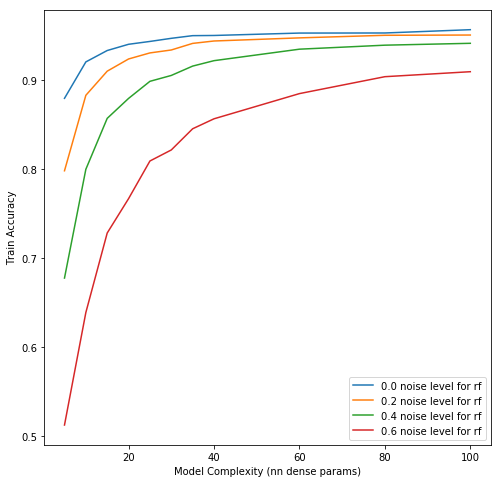

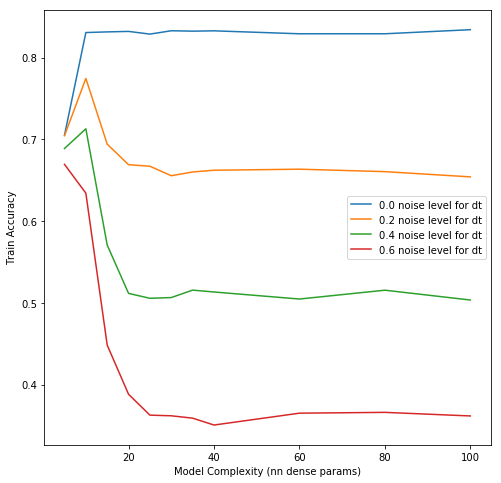

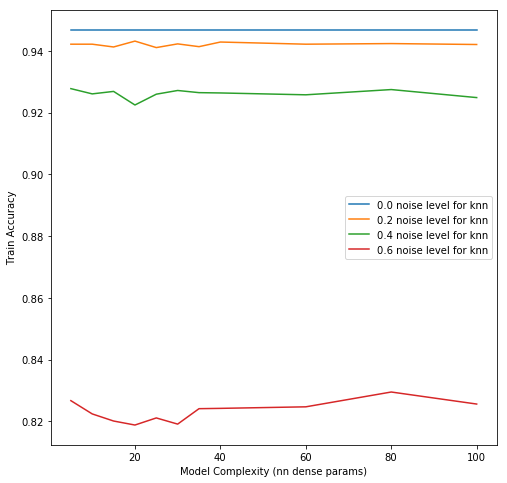

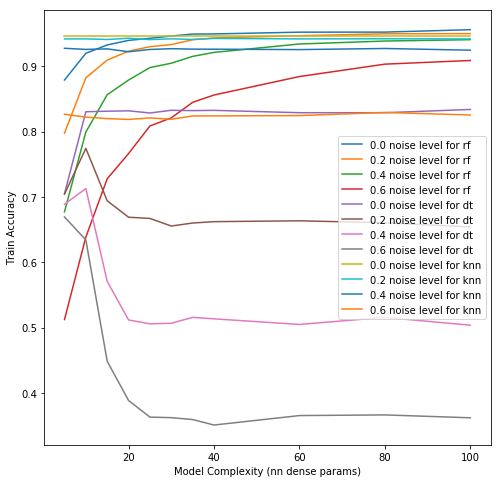

In [94]:
# TRAIN
plot_trial(trial, 0, m_types = ['rf'])
plot_trial(trial, 0, m_types = ['dt'])
plot_trial(trial, 0, m_types = ['knn'])
plot_trial(trial, 0)

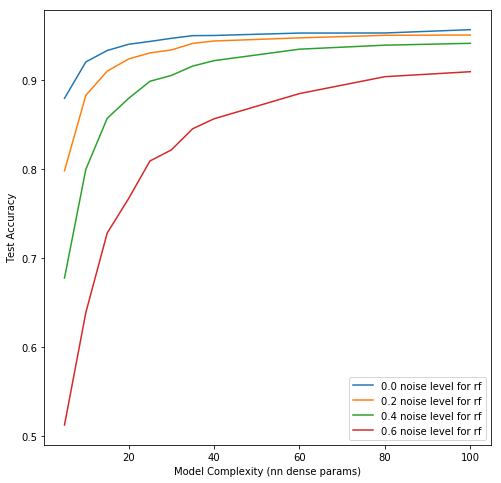

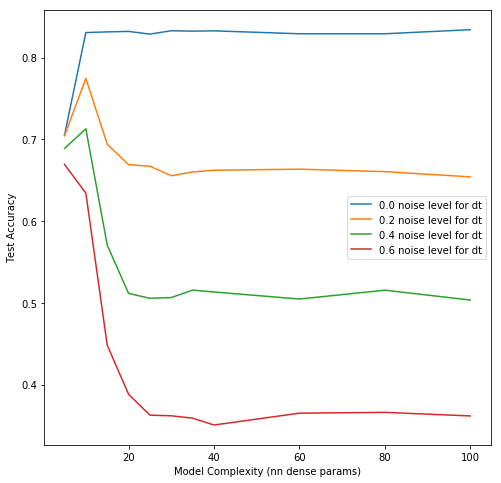

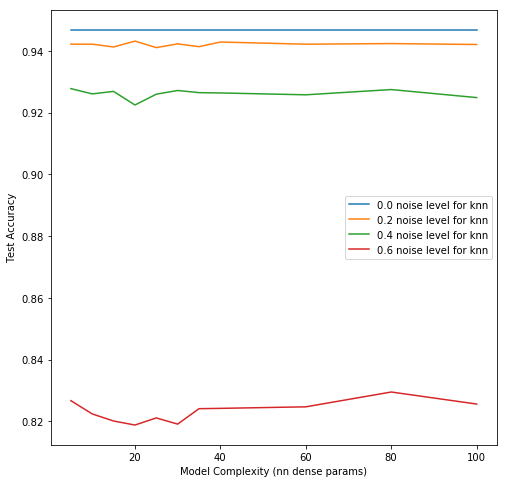

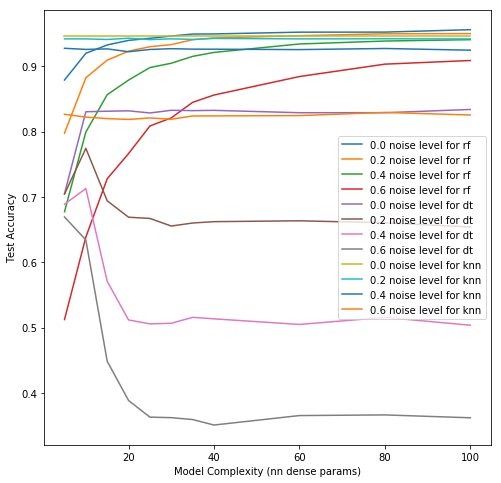

In [95]:
# TEST
plot_trial(trial, 1, m_types = ['rf'])
plot_trial(trial, 1, m_types = ['dt'])
plot_trial(trial, 1, m_types = ['knn'])
plot_trial(trial, 1)